# **Common Statistical Test - case_study_1**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
scipy.__version__

In [4]:
df=pd.read_csv('/content/aztunes.csv')
df.head()

,user_id,age_group,subscription_status,engagement_time
0,14451,18-34,subscribed,5.55
1,18386,under 18,subscribed,5.12
2,12305,35 and over,not_subscribed,4.25
3,17546,18-34,subscribed,8.54
4,15399,18-34,subscribed,12.12


In [6]:
df.shape

(1000, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1000 non-null   int64  
 1   age_group            1000 non-null   object 
 2   subscription_status  1000 non-null   object 
 3   engagement_time      1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [8]:
df.isna().sum()

,0
user_id,0
age_group,0
subscription_status,0
engagement_time,0


In [9]:
df.describe()

,user_id,engagement_time
count,1000.000000,1000.000000
mean,15024.803000,6.180030
std,2927.044957,2.757166
min,10000.000000,0.220000
25%,12452.500000,3.917500
50%,15184.000000,6.000000
75%,17481.250000,8.110000
max,19976.000000,16.980000


Sample mean: 6.18


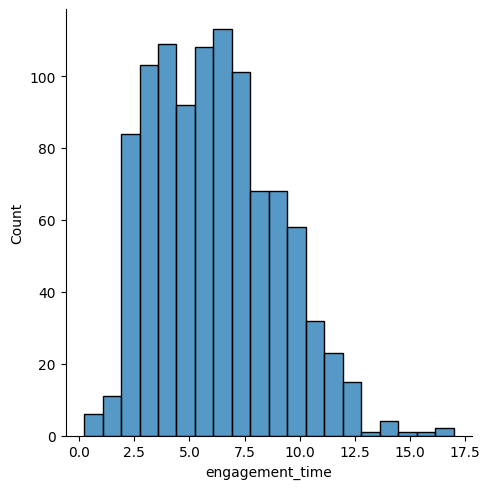

In [10]:
print('Sample mean:', np.round(df.engagement_time.mean(),2))
sns.displot(df.engagement_time)
plt.show()



In [13]:
hyp_mean = 6
t_stat,p_value = stats.ttest_1samp(df['engagement_time'], hyp_mean, alternative='greater')
print("Test Statistic =",t_stat)
print("p-value =",p_value)

Test Statistic = 2.0648187232381248
p-value = 0.019598877431817586


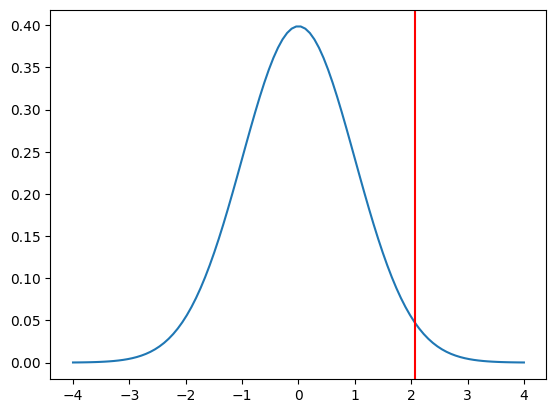

In [14]:
from scipy.stats import t
x = np.linspace(-4, 4, 100)
plt.plot(x, t.pdf(x,df=len(df)-1))
plt.axvline(x = t_stat, c = 'r')
plt.show()


In [17]:
pd.crosstab(df.age_group,df.subscription_status,margins=True)

subscription_status,not_subscribed,subscribed,All
age_group,,,
18-34,103,262,365
35 and over,237,171,408
under 18,107,120,227
All,447,553,1000


<Axes: xlabel='age_group'>

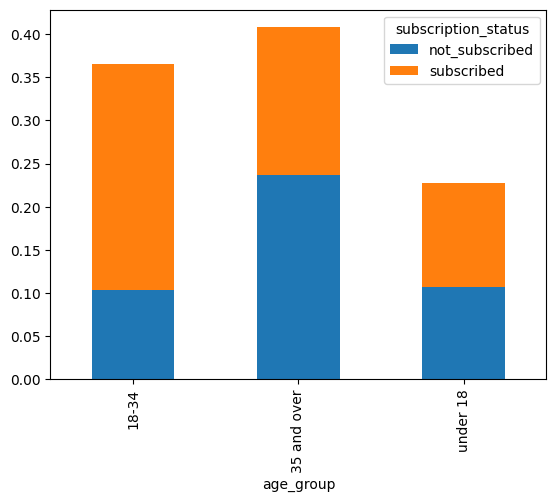

In [18]:
pd.crosstab(df.age_group,df.subscription_status,normalize=True) .plot(kind='bar' , stacked=True)

In [21]:
contingency_table = pd.crosstab(df['age_group'], df['subscription_status']) # Changed 'age group' to 'age_group'
contingency_table

subscription_status,not_subscribed,subscribed
age_group,,
18-34,103,262
35 and over,237,171
under 18,107,120


In [23]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print("Test Statistic =",chi)
print("p-value =",p_value)

print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)



Test Statistic = 70.23716243606756
p-value = 5.600076564450542e-16
Degrees of freedom = 2
Expected frequencies 
 [[163.155 201.845]
 [182.376 225.624]
 [101.469 125.531]]


In [25]:
if p_value < 0.05:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the r')
else:
  print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the r')


As the p-value 5.600076564450542e-16 is less than the level of significance, we reject the r
